<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/10_Logistic_regression_in_remote_sensing.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 09 Linear trend: forest degradation</font></div>_**

# 1.0 Libraries

To install ```scikit-eo```, ```rasterio``` and ```earthpy``` you can do it with the following line:



In [ ]:
!pip install scikeo rasterio earthpy

Libraries to be used:

In [26]:
import rasterio
import numpy as np
from scikeo.linearTrend import linearTrend
import matplotlib.pyplot as plt
import earthpy.plot as ep
from scikeo.writeRaster import writeRaster as wr

Connecting to Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.0 Optical image

The images to be used can be downloaded [here](https://drive.google.com/drive/folders/1mGSSg_sRFS3_SeNrR390w3UEMmMwHwg8?usp=sharing):

In [6]:
# path
path_raster = "/content/drive/MyDrive/Packages/scikit-eo_data/09_linearTrend/EVI_2000_2015.tif"

# reading raster
ts_img = rasterio.open(path_raster)

Let´s plot the images from 2000 to 2015:

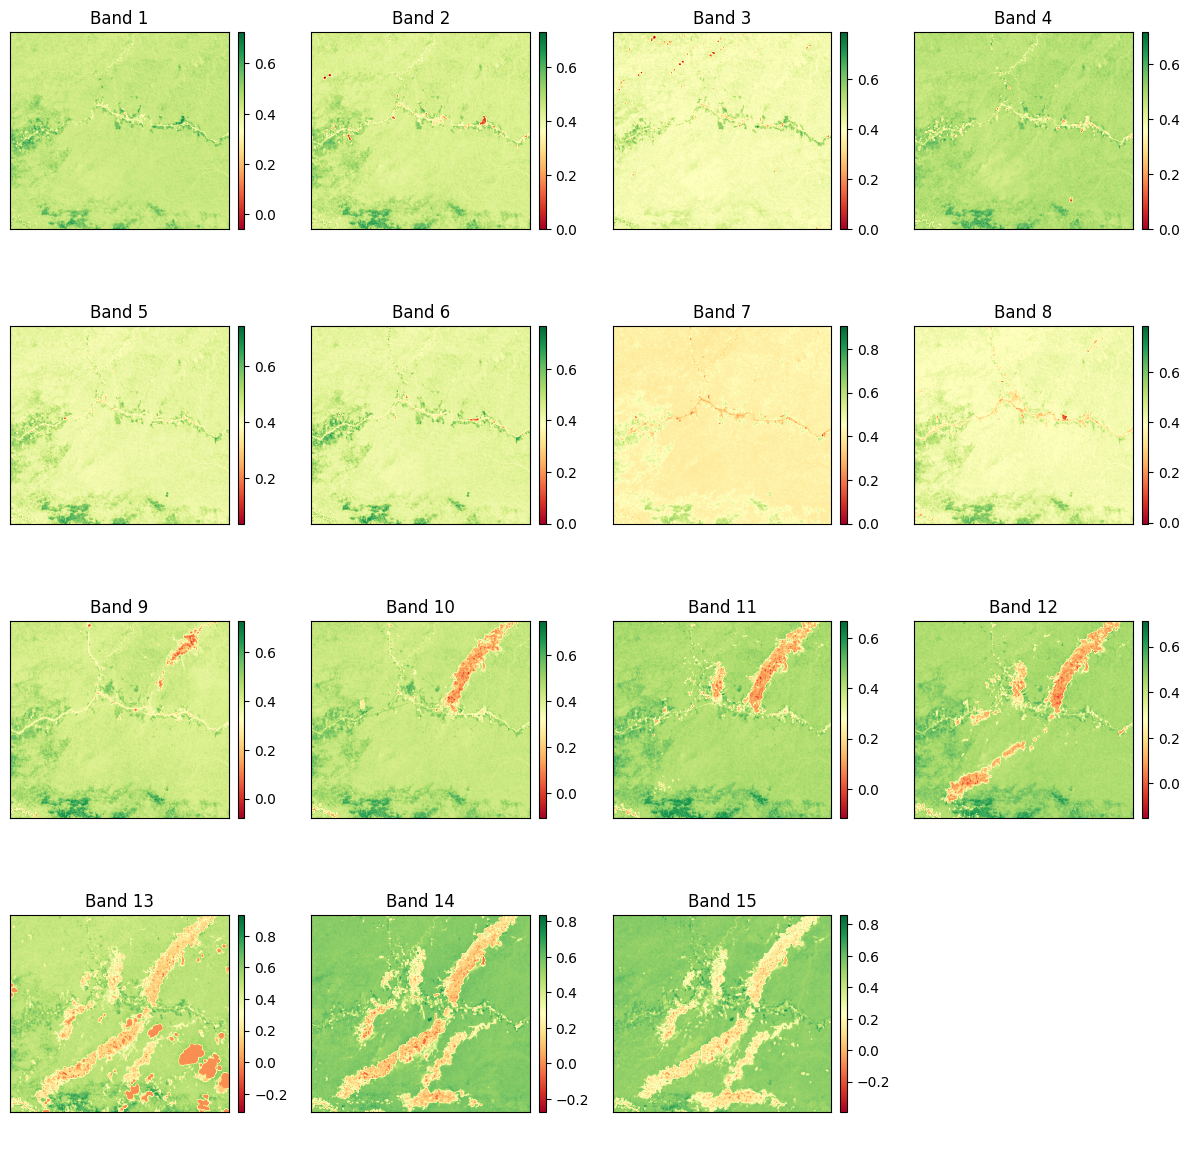

array([[<Axes: title={'center': 'Band 1'}>,
        <Axes: title={'center': 'Band 2'}>,
        <Axes: title={'center': 'Band 3'}>,
        <Axes: title={'center': 'Band 4'}>],
       [<Axes: title={'center': 'Band 5'}>,
        <Axes: title={'center': 'Band 6'}>,
        <Axes: title={'center': 'Band 7'}>,
        <Axes: title={'center': 'Band 8'}>],
       [<Axes: title={'center': 'Band 9'}>,
        <Axes: title={'center': 'Band 10'}>,
        <Axes: title={'center': 'Band 11'}>,
        <Axes: title={'center': 'Band 12'}>],
       [<Axes: title={'center': 'Band 13'}>,
        <Axes: title={'center': 'Band 14'}>,
        <Axes: title={'center': 'Band 15'}>, <Axes: >]], dtype=object)

In [19]:
ep.plot_bands(ts_img.read(), cmap = 'RdYlGn', cols = 4)

Instance of ```linearTrend```:

In [10]:
inst = linearTrend(image = ts_img)

Applying the ```LN()``` function:

In [11]:
trend = inst.LN()

Dictionary of esults:

In [12]:
# dictionary as result
trend.keys()

dict_keys(['slope', 'intercept', 'pvalue'])

Let´s plot the *slope* and *p-value* obtained:

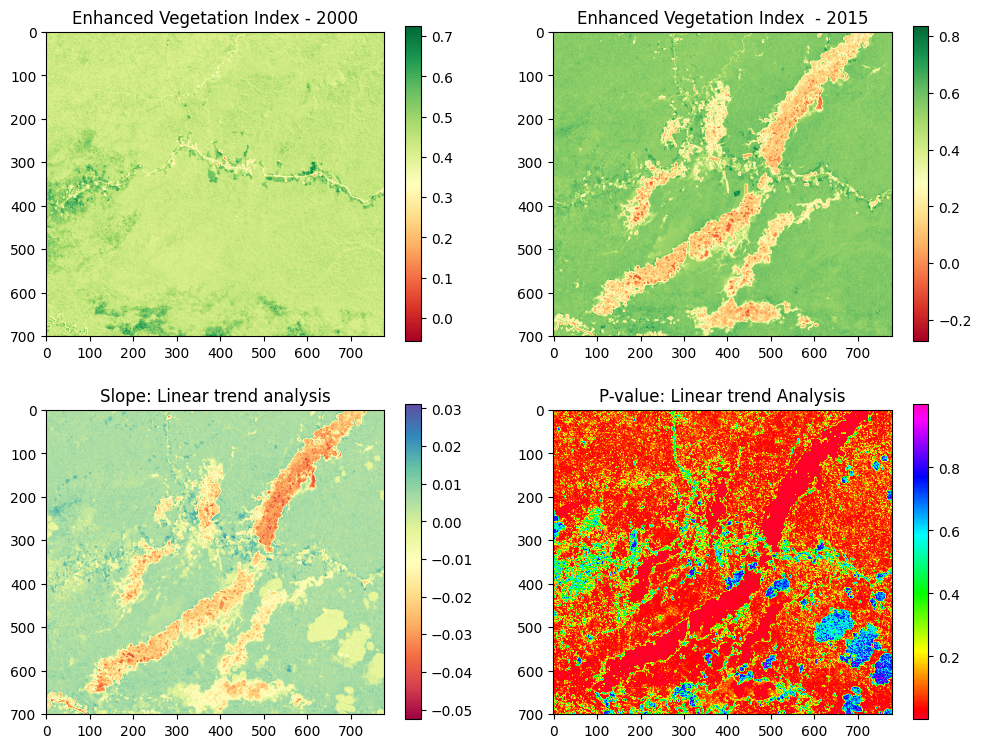

In [29]:
# Let´s plot
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 9))
evi_2001 = axes[0][0].imshow(ts_img.read(1), cmap = 'RdYlGn')
axes[0][0].set_title("Enhanced Vegetation Index - 2000")
axes[0][0].grid(False)
bar1 = fig.colorbar(evi_2001, ax = axes[0][0])

evi_2015 = axes[0][1].imshow(ts_img.read(14), cmap = 'RdYlGn')
axes[0][1].set_title("Enhanced Vegetation Index  - 2015")
axes[0][1].grid(False)
bar2 = fig.colorbar(evi_2015, ax = axes[0][1])

slope = axes[1][0].imshow(trend.get('slope'), cmap = 'Spectral')
axes[1][0].set_title("Slope: Linear trend analysis")
axes[1][0].grid(False)
bar3 = fig.colorbar(slope, ax = axes[1][0])

pvalue = axes[1][1].imshow(trend.get('pvalue'), cmap = 'gist_rainbow')
axes[1][1].set_title("P-value: Linear trend Analysis")
axes[1][1].grid(False)
bar4 = fig.colorbar(pvalue, ax = axes[1][1])

In [ ]:

# saving raster data
wr(arr = trend.get('pvalue'),
   image = ts_img,
   filename = 'PVALUE_RASTER',
   filepath = '/content/drive/MyDrive/folder',
   n = 1)